## Script related to processing for full data result

this script need to solve two things:

1. to have a fair comparison to MaxFuse, the full dataset final filtering should be in the same level. To do this, we will filter out low-quality matches produced by other methods based on the distance in their respective embedded space. Cell pairs with larger distance (1 - pearson correlation) will be filtered out.
2. on top of that, since bindsc can not handle the full data size, we splitted the run into two. we need to combine them.
3. after all this, we will do umap calculation in python, because it is just faster here compared to done in R lol.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
sys.path.append("./")
import metrics
import utils

## filter seurat results

In [8]:
root_dir = '/tonsil_v2/match/match_output/full/sr/'

srx = pd.read_csv(root_dir + "full_embed_x0.csv")
sry = pd.read_csv(root_dir + "full_embed_y0.csv")
sr_dist = utils.cdist_correlation(sry.to_numpy(), srx.to_numpy())
sr_full_match, sr_scores = metrics.get_knn_matching(sr_dist)
srmatch = [np.arange(sry.shape[0]),sr_full_match,sr_scores]
df_dict = {'id1':srmatch[0], 'id2':srmatch[1], 'score':srmatch[2]}
df = pd.DataFrame.from_dict(df_dict)

# save
#df.to_csv("/tonsil_v2/match/match_output/full/sr/sr_match_id_y2x.csv")
# filter
df_03 = df.loc[df['score'] >= df.score.quantile(0.3),:]
# save
#df_03.to_csv("/tonsil_v2/match/match_output/full/sr/sr_match_id_y2x_filt03.csv")

### filter harmony results

In [1]:
root_dir = '/tonsil_v2/match/match_output/full/hm/'

hmx = pd.read_csv(root_dir + "full_embed_x0.csv")
hmy = pd.read_csv(root_dir + "full_embed_y0.csv")
hm_dist = utils.cdist_correlation(hmy.to_numpy(), hmx.to_numpy())
hm_full_match, hm_scores = metrics.get_knn_matching(hm_dist)
hmmatch = [np.arange(hmy.shape[0]),hm_full_match,hm_scores]
df_dict = {'id1':hmmatch[0], 'id2':hmmatch[1], 'score':hmmatch[2]}
df = pd.DataFrame.from_dict(df_dict)

# save
#df.to_csv("/tonsil_v2/match/match_output/full/hm/hm_match_id_y2x.csv")
# filter
df_03 = df.loc[df['score'] >= df.score.quantile(0.3),:]
# save
#df_03.to_csv("/tonsil_v2/match/match_output/full/hm/hm_match_id_y2x_filt03.csv")

### filter liger results

In [ ]:
root_dir = '/tonsil_v2/match/match_output/full/lg/'

lgx = pd.read_csv(root_dir + "full_embed_x0.csv")
lgy = pd.read_csv(root_dir + "full_embed_y0.csv")
lg_dist = utils.cdist_correlation(lgy.to_numpy(), lgx.to_numpy())
lg_full_match, lg_scores = metrics.get_knn_matching(lg_dist)
lgmatch = [np.arange(lgy.shape[0]),lg_full_match,lg_scores]
df_dict = {'id1':lgmatch[0], 'id2':lgmatch[1], 'score':lgmatch[2]}
df = pd.DataFrame.from_dict(df_dict)

# save
#df.to_csv("/tonsil_v2/match/match_output/full/lg/lg_match_id_y2x.csv")
# filter
df_03 = df.loc[df['score'] >= df.score.quantile(0.3),:]
# save
#df_03.to_csv("/tonsil_v2/match/match_output/full/lg/lg_match_id_y2x_filt03.csv")

since bindsc can not run on the full size dataset so we split into two runs.

now we can combine them back.

### filter bindsc results

In [2]:
root_dir = '/tonsil_v2/match/match_output/'

bscx = pd.read_csv(root_dir+"BSC_full_embed_x0_finV_p1.csv")
bscy = pd.read_csv(root_dir+"BSC_full_embed_y0_finV_p1.csv")
bsc_dist = utils.cdist_correlation(bscy.to_numpy(), bscx.to_numpy())
bsc_full_match, bsc_scores = metrics.get_knn_matching(bsc_dist)
bscmatch = [np.arange(bscy.shape[0]),bsc_full_match,bsc_scores]

In [3]:
df_dict = {'id1':bscmatch[0], 'id2':bscmatch[1], 'score':bscmatch[2]}
df = pd.DataFrame.from_dict(df_dict)
df1 = df # part 1

In [5]:
# part 2
root_dir = '/tonsil_v2/match/match_output/'

bscx = pd.read_csv(root_dir+"BSC_full_embed_x0_finV_p2.csv")
bscy = pd.read_csv(root_dir+"BSC_full_embed_y0_finV_p2.csv")
bsc_dist = utils.cdist_correlation(bscy.to_numpy(), bscx.to_numpy())
bsc_full_match, bsc_scores = metrics.get_knn_matching(bsc_dist)
bscmatch = [np.arange(bscy.shape[0]),bsc_full_match,bsc_scores]
df_dict = {'id1':bscmatch[0], 'id2':bscmatch[1], 'score':bscmatch[2]}
df = pd.DataFrame.from_dict(df_dict)

# add index 89459 length of part 1
df['id1'] = df['id1'] + 89459
df

,id1,id2,score
0,89459,422,0.877280
1,89460,4825,0.930938
2,89461,8038,0.918204
3,89462,12370,0.946005
4,89463,9592,0.931810
...,...,...,...
89455,178914,383,0.951695
89456,178915,10942,0.916880
89457,178916,181,0.795550
89458,178917,12959,0.927544


### combine result from part 1 and part 2

In [ ]:
df_all = pd.concat([df, df2])
# save
#df_all.to_csv("/tonsil_v2/match/match_output/bsc_match_id_y2x_p1p2.csv")
# filter
df_all_03 = df_all.loc[df_all['score'] >= df_all.score.quantile(0.3),:]
# save
#df_all_03.to_csv("/tonsil_v2/match/match_output/bsc_match_id_y2x_p1p2_filt03.csv")

## Then with the matching produced, we can calculate the accuracy and confu matrix

In [9]:
## retreive matching information
df_all_03 = pd.read_csv('/tonsil_v2/match/match_output/full/lg/lg_match_id_y2x_filt03.csv')
lgmatch = [df_all_03.loc[:,'id2'].to_list(), df_all_03.loc[:,'id1'].to_list(), df_all_03.loc[:,'score'].to_list()]
df_all_03 = pd.read_csv('/tonsil_v2/match/match_output/full/sr/sr_match_id_y2x_filt03.csv')
srmatch = [df_all_03.loc[:,'id2'].to_list(), df_all_03.loc[:,'id1'].to_list(), df_all_03.loc[:,'score'].to_list()]
df_all_03 = pd.read_csv('/tonsil_v2/match/match_output/full/hm/hm_match_id_y2x_filt03.csv')
hmmatch = [df_all_03.loc[:,'id2'].to_list(), df_all_03.loc[:,'id1'].to_list(), df_all_03.loc[:,'score'].to_list()]
df_all_03 = pd.read_csv('/tonsil_v2/match/match_output/bsc_match_id_y2x_p1p2_filt03.csv')
bscmatch = [df_all_03.loc[:,'id2'].to_list(), df_all_03.loc[:,'id1'].to_list(), df_all_03.loc[:,'score'].to_list()]
df_all_03 = pd.read_csv('/tonsil_v2/match/match_output/full/mf/fullID_SV.csv')
mfmatch = [df_all_03.loc[:,'idx1'].to_list(), df_all_03.loc[:,'idx2'].to_list(), df_all_03.loc[:,'score'].to_list()]
## 
meta_pro = pd.read_csv("/tonsil_v2/Codex/FCS_output_DeepCell_extOnly/formatch_clusters_x28_y715_wstepV2.csv")
meta_rna = pd.read_csv("/tonsil_v2/RNA/tonsil_rna_0510_meta.csv")

In [10]:
# for liger specifically as some a couple cells got filtered
lgx_fid = pd.read_csv("/tonsil_v2/match/match_output/full/lg/d1_id.csv")
lgy_fid = pd.read_csv("/tonsil_v2/match/match_output/full/lg/d2_id.csv")

meta_rna_lg = meta_rna.drop(index = lgx_fid['id']-1, axis=0)
meta_pro_lg = meta_pro.drop(index = lgy_fid['id']-1, axis=0)

In [11]:
ann_listlv1 = []
ann_listlv2 = []

rnalabel = meta_rna['cluster.info'].to_numpy()
prolabel = meta_pro['cluster.term'].to_numpy()

rnalabel_lg = meta_rna_lg['cluster.info'].to_numpy()
prolabel_lg = meta_pro_lg['cluster.term'].to_numpy()

order = (2, 1)
acc_ann_hm = metrics.get_matching_acc(
        matching=hmmatch, 
        labels1=rnalabel, 
        labels2=prolabel,
        order = order
    )

acc_ann_lg = metrics.get_matching_acc(
        matching=lgmatch, 
        labels1=rnalabel_lg, 
        labels2=prolabel_lg,
        order = order
    )

acc_ann_sr = metrics.get_matching_acc(
        matching=srmatch, 
        labels1=rnalabel, 
        labels2=prolabel,
        order = order
    )

acc_ann_mf = metrics.get_matching_acc(
        matching=mfmatch, 
        labels1=rnalabel, 
        labels2=prolabel,
        order = order
    )

acc_ann_bsc = metrics.get_matching_acc(
        matching=bscmatch, 
        labels1=rnalabel, 
        labels2=prolabel,
        order = order
    )
ann_listlv1.extend([acc_ann_mf, acc_ann_sr, acc_ann_lg, acc_ann_hm, acc_ann_bsc])
ann_listlv1

[0.9325841843513913,
 0.4068730388125484,
 0.5289448889314745,
 0.475483659765416,
 0.6611946376244581]

### then we can make the CM plots

### liger

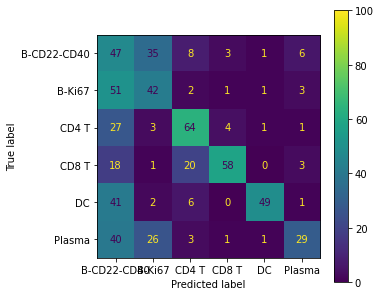

In [12]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(rnalabel_lg[lgmatch[0]], prolabel_lg[lgmatch[1]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(rnalabel)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
#plt.savefig('/tonsil_v2/plots/cm_lg_vani.svg')

### harmony

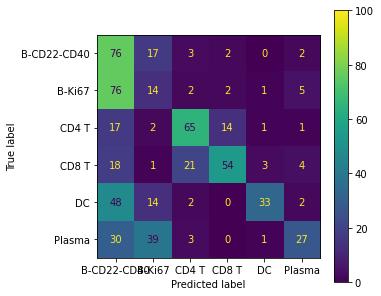

In [14]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(rnalabel[hmmatch[0]], prolabel[hmmatch[1]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(rnalabel)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
#plt.savefig('/tonsil_v2/plots/cm_hm.svg')

### seurat

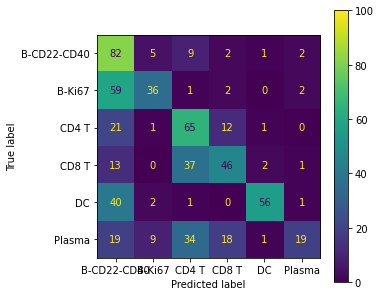

In [15]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(rnalabel[srmatch[0]], prolabel[srmatch[1]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(rnalabel)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
#plt.savefig('/tonsil_v2/plots/cm_sr.svg')

### bindsc

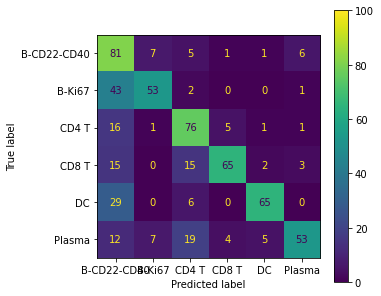

In [16]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(rnalabel[bscmatch[0]], prolabel[bscmatch[1]],)
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(rnalabel)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
#plt.savefig('/tonsil_v2/plots/cm_bsc.svg')

### maxfuse

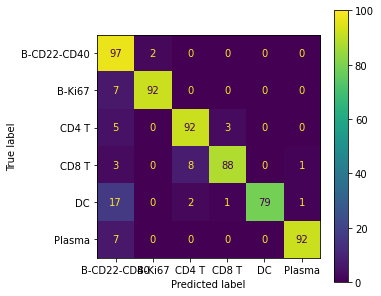

In [17]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(rnalabel[mfmatch[0]], prolabel[mfmatch[1]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(rnalabel)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
#plt.savefig('/tonsil_v2/plots/cm_mf.svg')

## UMAP calculation (nothing interesting)

### Bindsc

In [ ]:
import umap

## bsc
root_dir = '/tonsil_v2/match/match_output/'

bscx1 = pd.read_csv(root_dir+"BSC_full_embed_x0_finV_p1.csv")
bscy1 = pd.read_csv(root_dir+"BSC_full_embed_y0_finV_p1.csv") # these are the same RNA cells, so dont need to reuse for viz
bscx2 = pd.read_csv(root_dir+"BSC_full_embed_x0_finV_p2.csv")
bscy2 = pd.read_csv(root_dir+"BSC_full_embed_y0_finV_p2.csv")
#bscx12 = pd.concat([bscx1, bscx2])
bscy12 = pd.concat([bscy1, bscy2])

df_all_03 = pd.read_csv('/tonsil_v2/match/match_output/bsc_match_id_y2x_p1p2_filt03.csv')
#df_all_03
bscy12filt = bscy12.iloc[df_all_03['id1'].tolist(),:] # filter cdx cells

reducer = umap.UMAP()
embedding = reducer.fit_transform(np.vstack([bscx1, bscy12filt]))
ebddf = pd.DataFrame(embedding, columns = ['umap1', 'umap2'])
ebddf.to_csv("/tonsil_v2/match/match_output/full/bsc_inpg/umap.csv")

### seurat

In [ ]:
# add seurat
root_dir = '/tonsil_v2/match/match_output/full/sr/'
srx = pd.read_csv(root_dir + "full_embed_x0.csv")
sry = pd.read_csv(root_dir + "full_embed_y0.csv")
df_all_03 = pd.read_csv('/tonsil_v2/match/match_output/full/sr/sr_match_id_y2x_filt03.csv')
sryfilt = sry.iloc[df_all_03['id1'].tolist(),:]
#srxfilt = srx.iloc[np.unique(df_all_03['id2']).tolist(),:]
print([sryfilt.shape, srx.shape])
reducer = umap.UMAP()
embedding = reducer.fit_transform(np.vstack([srx, sryfilt]))
ebddf = pd.DataFrame(embedding, columns = ['umap1', 'umap2'])
ebddf.to_csv("/tonsil_v2/match/match_output/full/sr/umap.csv")

### harmony

In [ ]:
# for harmony
root_dir = '/tonsil_v2/match/match_output/full/hm/'
hmx = pd.read_csv(root_dir + "full_embed_x0.csv")
hmy = pd.read_csv(root_dir + "full_embed_y0.csv")
df_all_03 = pd.read_csv('/tonsil_v2/match/match_output/full/hm/hm_match_id_y2x_filt03.csv')
hmyfilt = hmy.iloc[df_all_03['id1'].tolist(),:]
#hmxfilt = hmx.iloc[np.unique(df_all_03['id2']).tolist(),:]
print([hmyfilt.shape, hmx.shape])
reducer = umap.UMAP()
embedding = reducer.fit_transform(np.vstack([hmx, hmyfilt]))
ebddf = pd.DataFrame(embedding, columns = ['umap1', 'umap2'])
ebddf.to_csv("/tonsil_v2/match/match_output/full/hm/umap.csv")

### liger

In [ ]:
# for harmony
root_dir = '/tonsil_v2/match/match_output/full/lg/'
lgx = pd.read_csv(root_dir + "full_embed_x0.csv")
lgy = pd.read_csv(root_dir + "full_embed_y0.csv")
df_all_03 = pd.read_csv('/tonsil_v2/match/match_output/full/lg/lg_match_id_y2x_filt03.csv')
lgyfilt = lgy.iloc[df_all_03['id1'].tolist(),:]
#hmxfilt = hmx.iloc[np.unique(df_all_03['id2']).tolist(),:]
print([lgyfilt.shape, lgx.shape])
reducer = umap.UMAP()
embedding = reducer.fit_transform(np.vstack([lgx, lgyfilt]))
ebddf = pd.DataFrame(embedding, columns = ['umap1', 'umap2'])
ebddf.to_csv("/tonsil_v2/match/match_output/full/lg/umap.csv")